---
"""
نکته برداری از سایت های:

1. https://faradars.org/courses/machine-learning-using-python-fvpht0091

 2. و چت جی پی تی و جیمینی

 """

In [3]:
# !pip uninstall scikit-learn
# !pip install scikit-learn==1.2.1

In [4]:
import sklearn
sklearn.__version__

'1.6.1'

---
# MNIST_dataset

In [5]:
from sklearn.datasets import fetch_openml

# fetch_openml تابعی در scikit-learn است که برای دانلود و بارگیری مجموعه‌های داده از مخزن OpenML استفاده می‌شود.

# OpenML یک پلتفرم آنلاین برای اشتراک‌گذاری مجموعه‌های داده، مدل‌های یادگیری ماشین و نتایج آزمایش‌ها است.

#این تابع به شما امکان می‌دهد به راحتی به طیف گسترده‌ای از مجموعه‌های داده موجود در OpenML دسترسی پیدا کنید. 

In [6]:
mnist_dataset = fetch_openml("mnist_784", as_frame=False)
# mnist_784 : این نام مجموعه داده MNIST را در OpenML مشخص می‌کند. مجموعه داده MNIST شامل تصاویر دست‌نویس ارقام 0 تا 9 است.

#as_frame=False : این آرگومان مشخص می‌کند که داده‌ها به عنوان یک DataFrame پانداز بارگیری نشوند، بلکه به عنوان یک آرایه NumPy بارگیری شوند. این کار معمولاً برای کارایی بیشتر در الگوریتم‌های یادگیری ماشین انجام می‌شود.


In [7]:
mnist_dataset.data.shape

"""
در خروجی:
784 پیکسل:

    هر تصویر در مجموعه داده MNIST یک تصویر سیاه و سفید 28x28 پیکسلی است.
    اگر تعداد پیکسل‌های ردیف‌ها و ستون‌ها را در هم ضرب کنیم (28 * 28)، به 784 می‌رسیم.
    بنابراین، هر تصویر به عنوان یک آرایه یک بعدی از 784 مقدار پیکسل ذخیره می‌شود.

70000:

    نکته مهم: این عدد نشان‌دهنده تعداد کل تصاویر در مجموعه داده MNIST است. 
    و توجه شود که تعداد سطرها نیست.
    به عبارت دیگر، مجموعه داده MNIST شامل 70000 تصویر دست‌نویس از ارقام 0 تا 9 است.
"""

'\nدر خروجی:\n784 پیکسل:\n\n    هر تصویر در مجموعه داده MNIST یک تصویر سیاه و سفید 28x28 پیکسلی است.\n    اگر تعداد پیکسل\u200cهای ردیف\u200cها و ستون\u200cها را در هم ضرب کنیم (28 * 28)، به 784 می\u200cرسیم.\n    بنابراین، هر تصویر به عنوان یک آرایه یک بعدی از 784 مقدار پیکسل ذخیره می\u200cشود.\n\n70000:\n\n    نکته مهم: این عدد نشان\u200cدهنده تعداد کل تصاویر در مجموعه داده MNIST است. \n    و توجه شود که تعداد سطرها نیست.\n    به عبارت دیگر، مجموعه داده MNIST شامل 70000 تصویر دست\u200cنویس از ارقام 0 تا 9 است.\n'

In [8]:
mnist_dataset.target.shape

(70000,)

In [9]:
X, y = mnist_dataset.data, mnist_dataset.target

In [10]:
import matplotlib.pyplot as plt

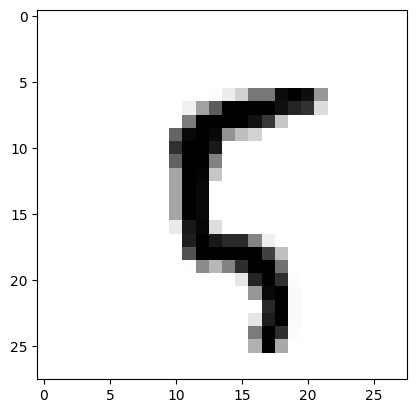

In [11]:
plt.imshow(X[100].reshape(28, 28), cmap="binary")
#هر تصویر یک ارایه یک بعدی از 784 پیکسل است 
#آرایه یک بعدی را به یک ماتریس دوبعدی با 28 ردیف و 28 ستون تبدیل کردیم.

# برای سیاه و سفید cmap="binary" را قرار میدیم

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
#اینکه 60000 را انتخاب کردیم چون عدد 60000 یک قرارداد استاندارد برای تقسیم مجموعه داده ها در  MNIST به مجموعه آموزشی و آزمایشی است 

 # باینری کسیفیکشن
 ### چون دوتا دسته بندی داریم میگیم باینری چون یا مثلا 4 هست یا نه

In [13]:
# stochastic gradient descent calssifier sklearn
#"Stochastic" استوکستیک به این معنی است که در هر مرحله از آموزش، الگوریتم از یک زیرمجموعه تصادفی (یا یک نمونه) از داده‌ها برای محاسبه گرادیان استفاده می‌کند، به جای استفاده از کل مجموعه داده. این کار باعث می‌شود آموزش سریع‌تر و کارآمدتر باشد، به خصوص برای مجموعه‌های داده بزرگ.
from sklearn.linear_model import SGDClassifier

In [14]:
y_train


array(['5', '0', '4', ..., '5', '6', '8'], shape=(60000,), dtype=object)

In [15]:
y_train8 = (y_train == "8")
y_test8 = (y_test == "8")

# یعنی میگوییم جاهایی که 8 هست را y_train8 در نظر بگیر  

In [16]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train8)

SGDClassifier()

In [17]:
y_train8

array([False, False, False, ..., False, False,  True], shape=(60000,))

In [18]:
sgd.predict(X_train[-3:])
#این خط کد، پیش‌بینی‌های مدل sgd را برای سه تصویر آخر در مجموعه داده آموزشی (X_train[-3:]) نمایش می‌دهد.
# و همانطور که میبینیم طبق کد قبل باید جواب فالس فالس و تروو باشد

array([False, False,  True])

In [19]:
sgd.score(X_train, y_train8)
# score به صورت دیفالت میانگین اکیورسی رو میده

0.8228

---
# cross_val_score
#ولیدشن که مقداری برای پیش تست بود را اینجا هم تعیین میکنیم

In [20]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(sgd, X_train, y_train8, cv=5, scoring="accuracy")


array([0.93875   , 0.94433333, 0.92491667, 0.91483333, 0.86175   ])

# DummyClassifier


"""
 DummyClassifier چیست و آیا به درد می‌خورد؟

بله، DummyClassifier در بعضی مواقع بسیار مفید است، اما برای پیش‌بینی واقعی از آن استفاده نمی‌کنیم!

🔹 DummyClassifier چیست؟

    DummyClassifier یک مدل خیلی ساده و احمقانه (Dummy) در sklearn است
     که بدون یادگیری از داده‌ها، فقط با یک استراتژی ساده پیش‌بینی انجام می‌دهد. این مدل برای مقایسه عملکرد مدل‌های یادگیری ماشین واقعی استفاده می‌شود.
    

🔹  آیا DummyClassifier به درد می‌خورد

    ✅ بله، اما نه برای پیش‌بینی‌های واقعی!
    ✅ برای مقایسه‌ی عملکرد مدل‌های واقعی و بررسی این که آیا مدل یادگیری ماشین چیزی از داده یاد گرفته یا فقط تصادفی پیش‌بینی می‌کند، فوق‌العاده مفید است.
    ✅ اگر مدل واقعی شما فقط کمی بهتر از DummyClassifier بود، یعنی مشکل دارید

    🔄 بررسی تأثیر توزیع کلاس‌ها
    در مسائل طبقه‌بندی نامتوازن (مثلاً وقتی ۹۵٪ داده‌ها کلاس ۱ هستند و ۵٪ کلاس ۰)، مدل‌های یادگیری ممکن است فقط کلاس غالب را پیش‌بینی کنند.
     DummyClassifier کمک می‌کند بفهمیم آیا مدل واقعی ما بهتر از حدس تصادفی است یا نه.

    ✅ تست کد و پایپ‌لاین داده‌ها
    اگر یک مدل پیچیده اجرا نمی‌شود، می‌توان از DummyClassifier استفاده کرد تا ببینیم آیا مشکل از کد است یا مدل
    
🔹 آیا DummyClassifier در مسائل رگرسیون هم هست؟

    بله! نسخه‌ی مشابه آن برای رگرسیون DummyRegressor است که مقدار ثابت یا تصادفی پیش‌بینی می‌کند
"""

In [22]:
from sklearn.dummy import DummyClassifier

# DummyClassifier میاد بیشترین کلاسی که وجود داره را نشان میده

In [23]:
dummy_c = DummyClassifier()
dummy_c.fit(X_train, y_train8)

DummyClassifier()

In [24]:
dummy_c.predict(X_train).sum()

np.int64(0)

In [25]:
cross_val_score(dummy_c, X_train, y_train8, cv=5, scoring="accuracy")

array([0.9025    , 0.9025    , 0.9025    , 0.9025    , 0.90241667])


# StratifiedKFold  
####اعتبارسنجی متقابل لایه‌بندی شده با K زیرمجموعه
"""
"متقابل" در اعتبارسنجی متقابل به این معنی است که بخش‌های مختلف داده‌ها به طور چرخشی و متناوب برای آموزش و ارزیابی مدل استفاده می‌شوند.
        
        در StratifiedKFold، علاوه بر حفظ نسبت کلاس‌ها در هر زیرمجموعه (که وظیفه "لایه بندی" یا "Stratified" است)، از روش اعتبارسنجی متقابل K-Fold نیز استفاده می‌شود.
        به عبارت دیگر، داده‌ها به K زیرمجموعه تقسیم می‌شوند و در هر تکرار، یک زیرمجموعه به عنوان مجموعه آزمایشی و بقیه زیرمجموعه‌ها به عنوان مجموعه آموزشی استفاده می‌شوند.
        این فرایند به صورت چرخشی بین زیر مجموعه ها انجام می شود.
        بنابراین، "متقابل" در اینجا نشان‌دهنده همین استفاده چرخشی و متناوب از زیرمجموعه‌ها برای آموزش و ارزیابی مدل است.
"""

In [26]:
#StratifiedKFold یک تکنیک اعتبارسنجی متقابل (cross-validation) در یادگیری ماشین است که برای تقسیم مجموعه داده‌ها به زیرمجموعه‌های آموزشی و اعتبارسنجی (یا آزمایشی) استفاده می‌شود، به طوری که توزیع کلاس‌ها در هر زیرمجموعه مشابه توزیع کلاس‌ها در مجموعه داده اصلی باشد.

#کاربرد StratifiedKFold:
    # StratifiedKFold برای ارزیابی عملکرد مدل در چندین زیرمجموعه از داده‌ها استفاده می‌شود.
    # این روش برای ارزیابی عملکرد مدل در شرایط مختلف و کاهش واریانس نتایج مناسب است.
    # این روش به خصوص برای مجموعه‌های داده‌های کوچک مفید است، زیرا امکان استفاده از تمام داده‌ها برای آموزش و اعتبارسنجی را فراهم می‌کند.

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [27]:
skf = StratifiedKFold(n_splits=5)

In [28]:
for train_i, test_i in skf.split(X_train, y_train8):
  cloned_sgd = clone(sgd)
  X_train_f = X_train[train_i]
  y_train8_f = y_train8[train_i]
  X_test_f = X_train[test_i]
  y_test_f = y_train8[test_i]

  cloned_sgd.fit(X_train_f, y_train8_f)
  y_pred = cloned_sgd.predict(X_test_f)
  correct_predictions = (y_pred == y_test_f).sum()
  print(correct_predictions/len(y_pred))

0.9305
0.8939166666666667
0.9218333333333333
0.90125
0.93425


In [29]:
# به جای حلقه فور بالا میشه از cross_val_score استفاده کرد
#یعنی وقتی از cross_val_score استفاده می‌کنید و مقدار cv=5 را تنظیم می‌کنید، اگر متغیر هدف شما طبقه‌بندی باشد (یعنی y_train8 شامل کلاس‌های گسسته باشد)، به‌طور خودکار از StratifiedKFold برای تقسیم داده‌ها استفاده می‌کند.
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd, X_train, y_train8, cv=5, scoring="accuracy")
print(scores)

#cross_val_score هم برای طبقه‌بندی و هم برای رگرسیون کار می‌کند، ولی نوع تقسیم داده‌ها (KFold یا StratifiedKFold) بسته به نوع y_train8 متفاوت خواهد بود.

#نکته مهم : توجه شود که cross_val_score یک ابزار برای انجام Cross Validation است، نه یک معیار ارزیابی!


[0.93875    0.92975    0.92816667 0.93416667 0.94183333]



 # معیارهای ارزیابی برای رگرسیون (Regression Metrics)
"""
۱. خطای میانگین مطلق (Mean Absolute Error - MAE)

    🔹 میانگین قدر مطلق اختلاف بین مقدار واقعی و مقدار پیش‌بینی‌شده را نشان می‌دهد.
    🔹 مناسب برای زمانی که همه خطاها اهمیت یکسانی دارند.


۲. خطای میانگین مربعات (Mean Squared Error - MSE)

    🔹 مثل MAE است، اما خطاهای بزرگ را بیشتر جریمه می‌کند، چون مقدار را به توان ۲ می‌برد.
    🔹 باعث می‌شود مدل روی کاهش خطاهای بزرگ‌تر تمرکز کند.


۳. ریشه‌ی خطای میانگین مربعات (Root Mean Squared Error - RMSE)

    🔹 چون MSE مقدار را به توان ۲ می‌برد، واحد آن متفاوت از مقدار اصلی است. برای بازگرداندن واحد به مقیاس اصلی، از ریشه‌ی دوم استفاده می‌شود.


۴. ضریب تعیین (R² Score یا Coefficient of Determination)

    🔹 نشان می‌دهد مدل چقدر خوب تغییرات داده را توضیح می‌دهد.
    🔹 مقدار آن بین ۰ تا ۱ است (هرچه به ۱ نزدیک‌تر باشد، مدل بهتر است).
    🔹 اگر R² منفی شود، یعنی مدل حتی از یک حدس تصادفی هم بدتر است!
   """

---
"""
#  معیارهای ارزیابی برای طبقه‌بندی (Classification Metrics)

۱. ماتریس سردرگمی (Confusion Matrix)
🔹 یک جدول است که تعداد نمونه‌های درست و غلط پیش‌بینی‌شده را برای هر کلاس نشان می‌دهد.

    مقدارها در ماتریس سردرگمی:

    TP: مدل به درستی یک نمونه مثبت را مثبت پیش‌بینی کرده است.
    FP: مدل به اشتباه یک نمونه منفی را مثبت پیش‌بینی کرده است (خطای نوع اول).
    FN: مدل به اشتباه یک نمونه مثبت را منفی پیش‌بینی کرده است (خطای نوع دوم).
    TN: مدل به درستی یک نمونه منفی را منفی پیش‌بینی کرده است.

    نکته : به عنوان نمونه ✅ False Positive (FP): یک فرد سالم را بیمار تشخیص داده‌ایم.
    ❌ اشتباه: "سالمی که در اصل بیمار بوده" → این تعریف نادرست است چون فرد واقعاً سالم است. 


۲. دقت (Accuracy)

    Accuracy = (TP + TN) / (TP + TN + FP + FN)
     برای وقتی داده‌ها متعادل هستند خوبه
    🔹 نشان می‌دهد چه درصدی از پیش‌بینی‌ها درست بوده‌اند.
    🔹 مناسب برای زمانی که داده‌ها بالانس هستند.


۳. دقت کلاس مثبت (Precision)

    Precision = TP / (TP + FP)
    🔹 درصد پیش‌بینی‌های مثبت که واقعاً مثبت هستند. 
    یعنی از مثبت هایی که پیش بینی کرده چند درصدشون درست بودن
    Precision → وقتی False Positive مهم است (مثل تشخیص مجرم در فرودگاه).
    🔹 مهم در مواردی مثل تشخیص اسپم (اگر Precision کم باشد، ایمیل‌های سالم را اشتباهی اسپم تشخیص می‌دهد).
    
    بیماری های حساس مانند سرطان و ایدز، پریسیژن بالا بسیار مهم است.
        زیرا تشخیص اشتباه فرد سالم به عنوان بیمار (FP) می‌تواند منجر به استرس روانی، هزینه‌های درمانی غیرضروری و عوارض جانبی داروهای سنگین شود.


        یا برنامه ای که فیلتر ویدئوهای بد برای کودکان است اگر فیلم منفی را به کودک نشان بده خیلی بد عمل کرده. توجه شود که اینجا پی یعنی فیلم بد 
        


۴. بازخوانی (Recall یا Sensitivity)

    Recall = TP / (TP + FN)
        برای وقتی False Positive مهم است (مثل تشخیص مجرم در فرودگاه). خوبه.
    🔹 چه درصدی از نمونه‌های مثبت را مدل درست تشخیص داده است.
    یعنی از کل تمام مثبت هایی که واقعا وجود داره مدل چند درصدشون رو تشخیص داده
    
    🔹 مهم مثل بیماریهای واگیردار مثل کرونا و .. که به عنوان فرد سالم باعث شیوع بیماری میشه
     یا تشخیص سرطان (اگر Recall کم باشد،  بنابراین فرد تحت درمان قرار نمیگیرد و ممکن است زمان را از دست بدهد).
     یا در امنیت که ممکنه فردی که بمب را حمل میکند را در فرودگاه تشخیص ندهد


۵. F1-Score (میانگین هارمونیک Precision و Recall)
     
     F1=2×((Precision×Recall)/(Precision+Recall))
    برای زمانی که وقتی Precision و Recall تعادل ندارند خوبه.
    🔹 وقتی Precision و Recall هر دو مهم باشند، از این معیار استفاده می‌شود.
    F1-Score چیست؟

    ✅ F1-Score میانگین هارمونیک Precision و Recall است و بین این دو تعادل ایجاد می‌کند.
        
        
    🔹 چرا این فرمول؟
    F1-Score زمانی بالا خواهد بود که هم Precision و هم Recall بالا باشند. اگر یکی از آنها خیلی کم باشد، مقدار F1 هم کاهش پیدا می‌کند.
    

۶. Specificity (ویژگی یا نرخ تشخیص منفی‌ها)
        
         Specificity = TN / (TN + FP)
        نشان می‌دهد مدل چقدر خوب نمونه‌های منفی را تشخیص داده است.
        از بین تمام نمونه‌های منفی واقعی، چند درصد را مدل درست تشخیص داده است
        مهم در تست‌های پزشکی که نمی‌خواهیم بیماران سالم را بیمار تشخیص دهیم.
        اگر یک بیماری نادر باشد و تستی داشته باشیم که Specificity بالا دارد، یعنی خیلی کم پیش می‌آید که فرد سالم را بیمار فرض کنیم.
        این همان منفی حالت ریکال است


NPV (ارزش پیش‌بینی منفی)

        NPV = TN / (TN + FN)
        Negative Predictive Value (NPV) نشان می‌دهد که از بین تمام نمونه‌هایی که مدل به عنوان "منفی" پیش‌بینی کرده، چند درصد واقعاً منفی بودند.
        
        کی NPV را انتخاب کنیم؟
         NPV بیشتر در سیستم‌های بحرانی مثل پزشکی و امنیت اهمیت پیدا می‌کند.
        ✅ اگر مدل شما در یک کاربردی استفاده می‌شود که "منفی بودن" مهم است (مثلاً عدم ابتلا به بیماری، عدم خطرناک بودن)، NPV مهم می‌شود.
        1️⃣ در تست‌های پزشکی:
            مثال: تست HIV
          
        2️⃣ در سیستم‌های امنیتی:
            مثال: اسکنر فرودگاه
            اگر سیستم بگوید "این فرد بمب ندارد"، ولی در واقع داشته باشد (False Negative)، فاجعه رخ می‌دهد!
                
        3️⃣ در تشخیص تقلب (Fraud Detection):
            مثال: بانک‌ها و سیستم‌های ضد کلاهبرداری
            اگر مدل بگوید "این تراکنش مشکوک نیست"، اما در واقع باشد (False Negative)، ممکن است پول مشتری دزدیده شود.
        
        این همان منفی حالت معیار ارزیابی پریسیژن است
        

۷. ROC Curve (منحنی مشخصه عملکرد گیرنده)

        برای مقایسه مدل‌ها خوبه
        🔹 ROC یک نمودار است نه یک عدد!
        
        ROC (Receiver Operating Characteristic Curve) یک نمودار است که True Positive Rate (Recall) را در برابر False Positive Rate نشان می‌دهد.

        ✅ محورهای ROC:

            محور FPR
             X: 1 - Specificity 
            (یا False Positive Rate)
            FPR = FP / (FP + TN)  

        
            محور TPR یا حساسیت
             Y: Sensitivity
            یا Recall (True Positive Rate یا TPR)
            TPR = TP / (TP + FN)  → همان Recall

        ✅ توضیح:
        هرچه منحنی ROC به گوشه بالا-چپ نزدیک‌تر باشد، مدل بهتر است.
        مناسب برای مقایسه مدل‌ها در تنظیمات مختلف.


۸. AUC Score (مساحت زیر منحنی ROC)
        برای مقایسه مدل‌ها خوبه.
         AUC از روی ROC محاسبه می‌شود!
        ✅ فرمول:
        AUC مقدار عددی بین 0 تا 1 است که نشان می‌دهد مدل چقدر خوب کلاس‌های 0 و 1 را جدا می‌کند.
        
        AUC = ∫ ROC Curve
        
        ✅ توضیح:
        
            AUC = 1 → مدل کاملاً عالی است.
        
            AUC = 0.5 → مدل تصادفی است (مانند پرتاب سکه).
        
            AUC < 0.5 → مدل حتی از حدس تصادفی هم بدتر است!
            

#___________________________________
 """

# Trade-off
"""
نکته مهم:
    
    وقتی پریسیژن کم بشه ریکال بالا میره و برعکس که به این میگن trade off 
     در مثال فیلتر ویدئوهای بد پریسیژن مهمتر از ریکال است چون در  حالت ریکال، ویدئوی خوب را به عنوان بد از دست بدیم مشکلی ایجاد نمیکنه
     

فرض کن یه سگ داری که هر وقت کسی از در رد میشه، شروع می‌کنه پارس کردن اگه مشکوک باشه.

    اگر آموزشش بدی که با هر صدایی پارس کنه، پارس زیاد می‌کنه (بالا بودن Recall)، ولی ممکنه اشتباهی به دوستت هم پارس کنه (پایین بودن Precision)

    اگه فقط وقتی کاملاً مطمئنه پارس کنه، ممکنه چند تا دزد رو هم از دست بده ولی فقط وقتی لازمه پارس می‌کنه (بالا بودن Precision)
    

        
برای تحلیل اینکه پریسیژن مهمتر یا ریکال؛ میتونی به مخرج نگا کنی مثلا در مورد پریسیژن اینطوری بررسی کنی که:

        بگویی ایا بهتره اشتباهاً منفی در نظر بگیرد یعنی FP زیاد میتونه مهمتر باشه؟ مثل مثال فیلتر ویدئو که ویدئوی خوب را هم بد تشخیص بده؟
        اما در مسئله بمب در فرودگاه ریکال مهم میشه و بالا رفتن FN مهمتر از اینه که FP یوقت بیشتر باشه
     
       
 
"""




#  نقطه ضعف های معیارهای ارزیابی
"""
هم Accuracy و هم Precision در داده‌های نامتوازن اشتباه می‌کنند

        توزیع نامتوازن داده‌ها (imbalanced datasets) به وضعیتی گفته می‌شود
     که در آن، تعداد نمونه‌های متعلق به یک یا چند کلاس،
      به طور قابل توجهی کمتر یا بیشتر از سایر کلاس‌ها باشد. 
     برای مثال، در یک مجموعه داده پزشکی که هدف آن تشخیص بیماری نادر است، ممکن است ۹۹٪ نمونه‌ها مربوط به افراد سالم و تنها ۱٪ نمونه‌ها مربوط به افراد بیمار باشند.
    

    Accuracy مشکل پیدا میکند چون اگر مدل فقط کلاس غالب را پیش‌بینی کند، مقدارش خیلی بالا می‌رود، حتی اگر مدل هیچ چیزی یاد نگرفته باشد! 

    Precision مشکل دارد چون ممکن است مدل فقط تعداد خیلی کمی از کلاس مثبت را شناسایی کند ولی مقدار بالایی داشته باشد، که باعث می‌شود فکر کنیم مدل خوب است، درحالی که خیلی موارد مثبت را از دست داده است.


مشکل Recall این است که:

     ممکن است مدل همه‌ی نمونه‌های مثبت را تشخیص دهد ولی مقدار خیلی زیادی FP (مثبت کاذب) تولید کند!
    🔹 به عبارت دیگر، Recall بالا نشان می‌دهد که مدل همه‌ی موارد مثبت را گرفته، ولی شاید خیلی موارد منفی را هم اشتباه مثبت تشخیص داده باشد.
    مثال: سیستم اسپم ایمیل
    اگر یک مدل تشخیص اسپم فقط بخواهد Recall بالا داشته باشد، ممکن است همه‌ی ایمیل‌ها را به‌عنوان اسپم علامت بزند!
    ✅ راه حل:
    باید Precision و Recall را متعادل کنیم. این کار با F1-Score یا ROC-AUC انجام می‌شود.
    

ضعف F1-Score چیست؟

    نمی‌توانیم اهمیت Precision و Recall را تغییر دهیم.

        گاهی ممکن است Precision برای ما مهم‌تر باشد (مثلاً در پزشکی).
        آزمایش‌های پزشکی خیلی حساس، مثل تست ایدز یا سرطان که اگر نتیجه مثبت شد، بیمار را تحت درمان سنگین قرار می‌دهیم.
        سیستم تشخیص چهره در امنیت فرودگاه که نمی‌خواهیم افراد بی‌گناه را به اشتباه مجرم شناسایی کنیم.

        گاهی Recall مهم‌تر است (مثلاً در تشخیص مجرمین در سیستم امنیتی یا بیماری های واگیردار).
           سیستم‌های غربالگری بیماری (مثلاً سرطان یا کرونا) که اگر کسی بیمار باشد ولی تشخیص داده نشود، ممکن است بیماری پخش شود یا دیر درمان شود.
    سیستم‌های امنیتی که دنبال تروریست‌ها هستند (بهتر است چند فرد بی‌گناه مشکوک شوند تا اینکه یک فرد خطرناک را از دست بدهیم).    

        ولی F1 همیشه وزن مساوی به هر دو می‌دهد.
    برای داده‌های خیلی نامتوازن، همچنان ممکن است به اندازه‌ی کافی قابل اعتماد نباشد.

        در بعضی موارد، Balanced Accuracy یا ROC-AUC معیارهای بهتری هستند.


 نتیجه‌گیری نهایی

    ✅ Accuracy در داده‌های نامتوازن گمراه‌کننده است.
    ✅ Precision اگر مدل تعداد کمی از کلاس مثبت را شناسایی کند، مقدارش بالا می‌رود ولی مدل ضعیف است.
    ✅ Recall اگر خیلی زیاد باشد، ممکن است مدل FP زیادی بدهد.
    ✅ F1-Score بین Precision و Recall تعادل ایجاد می‌کند و به مقدار کمتر وزن بیشتری می‌دهد.
    ✅ ضعف F1-Score این است که وزن Precision و Recall را تغییر نمی‌دهد.
    
    در نهایت، انتخاب معیار ارزیابی مناسب بستگی به مسئله مورد نظر و اهمیت کلاس‌های مختلف دارد.
     در صورتی که توزیع داده‌ها نامتوازن باشد، استفاده از معیارهای حساس به توزیع داده‌ها ضروری است.
"""


# confusion_matrix
### محاسبه ماتریس سردرگمی

In [30]:
# برای محاسبه ماترسی سردرگمی به پریدیکشن نیاز داریم
from sklearn.model_selection import cross_val_predict

In [31]:
y_pred = cross_val_predict(sgd, X_train, y_train8, cv=5)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_train8, y_pred)
# در خروجی سطرها را برای مقدار واقعی در نظر بگرید و ستونها را برای پریدیکشن ها



array([[52821,  1328],
       [ 2889,  2962]])

In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [35]:
precision_score(y_train8, y_pred)

0.6904428904428904

In [36]:
recall_score(y_train8, y_pred)

0.5062382498718168

In [37]:
f1_score(y_train8, y_pred)

0.584163297505177

In [38]:
X_train[0].shape

(784,)

In [39]:
sgd.decision_function([X_train[0]])

array([-5339.38785327])


# precision-recall curve

"""
# .predict() چیه؟
model.predict(X)
این تابع فقط برچسب نهایی رو می‌ده. یعنی تصمیم گرفته‌شده مدل برای هر نمونه:
>>> clf.predict([X[0]])
array([False])
مدل می‌گه: «بر اساس اطلاعاتی که دارم، این تصویر 8 نیست.»



# .predict_proba() چیه؟
model.predict_proba(X)
این تابع به جای فقط دادن خروجی نهایی، احتمال مدل برای هر کلاس رو می‌ده.
>>> clf.predict_proba([X[0]])
array([[0.13, 0.87]])
مدل می‌گه:
    احتمال اینکه این نمونه 8 نباشه → 13٪
    احتمال اینکه این نمونه 8 باشه → 87٪
    

# مدلهای decision_function() عبارتند از:
### SVM, SGDClassifier

#  و مدلهای predict_proba() عبارتند از :
### Logistic Regression, RandomForest, etc
"""

In [40]:
y_scores = cross_val_predict(sgd, X_train, y_train8, cv=5, method="decision_function")
# مدل‌هایی مثل SGDClassifier، خروجی نهایی‌شون فقط یک label نیست (مثل 0 یا 1)، بلکه می‌تونن یک نمره بدهند که میزان اعتماد یا فاصله از مرز تصمیم (decision boundary) رو نشون بده. متد "predict" فقط می‌گه کلاس 0 یا 1 و متد "decision_function" خروجی اش عدد پیوسته هستش

#

#  intuition: مرز تصمیم‌گیری یعنی چی؟
# تصور کن یک خط مرزی داریم که مدل می‌گه:
#     اگر سمت راست خط بودی → کلاس مثبت (مثلاً عدد 8)
#     اگر سمت چپ خط بودی → کلاس منفی (نه 8)
# فاصله تا این خط تصمیم، همون خروجی decision_function هست.
# 🔸 عدد مثبت: مدل فکر می‌کنه به کلاس مثبت نزدیک‌تره
# 🔹 عدد منفی: مدل فکر می‌کنه به کلاس منفی نزدیک‌تره
# 🔸 قدر مطلق عدد → میزان اعتماد


# چرا این مهمه برای precision-recall curve؟
# چون برای ساختن precision-recall curve، باید بدونیم مدل چقدر مطمئن بوده که یک نمونه متعلق به کلاس مثبته. این اطلاعات رو فقط از نمره خام (decision function) می‌گیریم، نه از برچسب نهایی (0/1).


In [41]:
from sklearn.metrics import precision_recall_curve
# این تابع رو import می‌کنیم چون:
#     وظیفه‌ش محاسبه precision و recall برای طیفی از آستانه‌ها (thresholdها) هست.

#آیا برای استفاده از Threshold، باید precision_recall_curve رو import کنیم؟
# ✳️ پاسخ کوتاه: نه لزوماً.
# 
# اگر فقط می‌خوای از یک threshold مشخص استفاده کنی (مثلاً threshold=0.5)  می‌تونی مستقیم بگی: y_pred = (y_scores > 0.5)


# چی هست Precision-Recall Curve؟
        # یه نموداره که نشون می‌ده:
        #وقتی Threshold رو زیاد و کم می‌کنی، precision و recall چجوری تغییر می‌کنن.
        # 
        # 🔹 محور افقی: Recall
        # 🔸 محور عمودی: Precision
        # 
        # بهت کمک می‌کنه ببینی:
        #     آیا مدل داره tradeoff خوبی بین precision و recall ایجاد می‌کنه یا نه؟
        #     بهترین threshold برای هدفت کجاست؟

# سوال :اگه خروجی مدل predict_proba باشه، آیا می‌تونی از precision_recall_curve استفاده کنی؟

        # ✅ بله! کاملاً می‌تونی و این کاملاً رایجه.
        # فقط دقت کن که y_scores باید احتمال کلاس مثبت (مثلاً 1) باشه، نه کل بردار [p0, p1].
        #مثلا:
        # from sklearn.metrics import precision_recall_curve
        # y_scores = model.predict_proba(X)[:, 1]  # احتمال تعلق به کلاس 1
        # precision, recall, thresholds = precision_recall_curve(y_true, y_scores)


# Threshold

In [42]:
prec, recall, thresholds = precision_recall_curve(y_train8, y_scores)
# این کد هر سه رو بهمون میده یعنی:
# این سه تا رو برمی‌گردونه:
        # precision: لیست مقادیر precision برای آستانه‌های مختلف
        # 
        # recall: لیست مقادیر recall متناظر
        # 
        # thresholds: لیستی از آستانه‌ها که با تغییر اون‌ها، precision و recall تغییر می‌کنن


# مهم : عبارت  Threshold (آستانه یا ثریشولد) یعنی به جای اینکه مدل مثلا در (مثل یک تشخیص‌دهنده اسپم یا تشخیص عدد 8 در دیتاست MNIST) فقط بگه بله یا خیر، بگه من مثلا 70 درصد مطمئنم که این تصویر 8 است  

In [43]:
thresholds.shape

(60000,)

In [44]:
recall.shape

(60001,)

In [45]:
import matplotlib.pyplot as plt

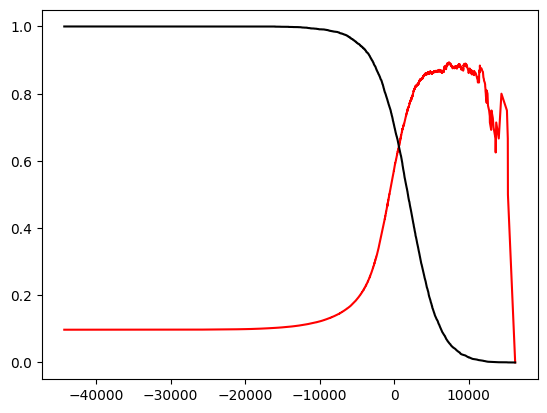

In [46]:
fig, ax = plt.subplots()
ax.plot(thresholds, prec[:-1], "r", label="Precision")
ax.plot(thresholds, recall[:-1], "black", label="Recall")

Text(0, 0.5, 'precision')

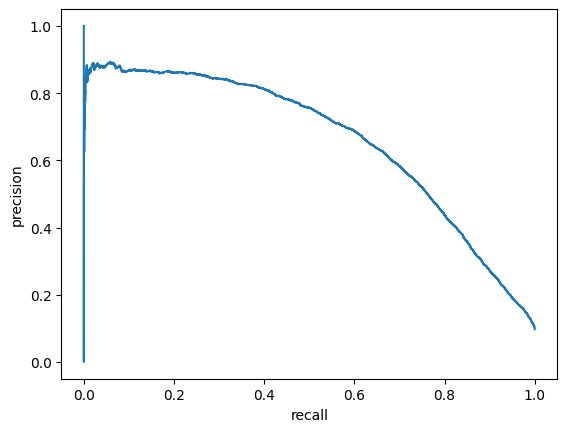

In [47]:
plt.plot(recall, prec)
plt.xlabel("recall")
plt.ylabel("precision")

In [48]:
thresh_for_80_prec = thresholds[(prec >= 0.8).argmax()]
# عبارت argmax یعنی  اندیسِ (index) اولین بزرگ‌ترین مقدار در یک آرایه یا اولین باری که شرط برقرار میشه.

# کدموون میگه اولین جایی که precision اولین باره که precision حداقل 0.8 شده، اندیسش چند بود؟

In [49]:
y_pred_80_prec = (y_scores >= thresh_for_80_prec)

In [50]:
y_pred_80_prec

array([False, False, False, ..., False, False,  True], shape=(60000,))

In [51]:
precision_score(y_train8, y_pred_80_prec)

0.8000651253663302

In [52]:
recall_score(y_train8, y_pred_80_prec)

0.41992821739873526

---
# ROC curve


In [53]:
from sklearn.metrics import roc_curve

In [54]:
fpr, tpr, thresholds = roc_curve(y_train8, y_scores)

Text(0, 0.5, 'TPR')

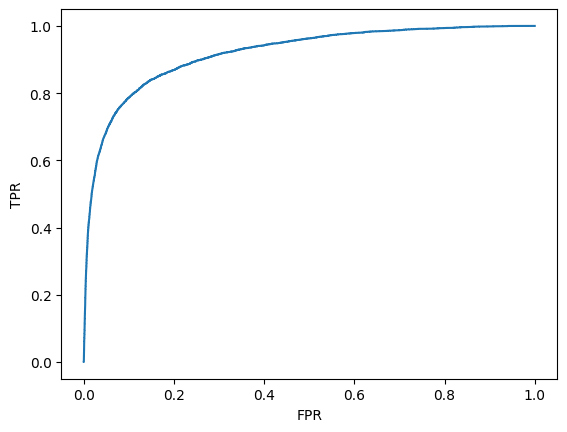

In [55]:
plt.plot(fpr, tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

In [56]:
from sklearn.metrics import roc_auc_score

In [57]:
roc_auc_score(y_train8, y_scores)

np.float64(0.9184836617424581)

---
# Random Forest Classifier

# Random Forest 
###  یعنی مجموعه‌ای از درخت‌های تصمیم + رأی‌گیری هوشمند برای پیش‌بینی بهتر
"""
###### الگوریتم Random Forest یکی از مهم‌ترین و قدرتمندترین الگوریتم‌های یادگیری ماشینه، مخصوصاً وقتی بخوای یه مدل قوی، منعطف و دقیق بدون تنظیمات زیاد بسازی.
"""

In [58]:
# Random Forest چگونه کار می‌کند؟ (توضیح گام‌به‌گام با مثال و شهود)
# 📌 گام 1: ساختن چندین مدل درختی روی داده‌های تصادفی
# فرض کن می‌خوای به یه گروه از متخصص‌ها بگی که یه تصویر دست‌نویس عدد «8» هست یا نه.
# 
#     به هر متخصص فقط بخشی از کل داده‌ها رو نشون می‌دی (نه همه‌شون) ← Bootstrapping
# 
#     به هر متخصص فقط اجازه می‌دی از بعضی ویژگی‌ها استفاده کنه ← Feature Randomness
# 
# ⛏ یعنی هر درخت یک دید متفاوت، ناقص، اما جالب از داده‌ها داره!


# 📌 گام 2: ساختن درخت تصمیم برای هر نمونه‌ی داده
# هر درخت یه ساختار ساده و سریع به شکل سوال‌های دودویی می‌سازه، مثل:
# 
# آیا pixel 217 > 127؟
# → بله؟ بریم چپ
# → نه؟ بریم راست
# ...
# درخت تا جایی ادامه پیدا می‌کنه که به یک نتیجه برسه (مثلاً "این تصویر احتمالاً عدد 8 هست").


# 📌 گام 3: جمع‌ کردن پیش‌بینی همه درخت‌ها (Voting یا Averaging)
# در Classification:
# هر درخت یک رأی می‌ده، مثلاً:
#     درخت 1: 8 هست
#     درخت 2: 8 نیست
#     درخت 3: 8 هست
#     ...
# جنگل تصمیم می‌گیره: "اگه اکثریت درخت‌ها گفتن این نمونه عدد 8 هست، پس قبول."
# 
# → اینو می‌گیم hard voting
#___________________________

# در Regression (پیش‌بینی عددی):
# هر درخت یک مقدار عددی می‌ده، و جنگل میانگین می‌گیره → averaging

#___________________________

#  چرا Random Forest انقدر قویه؟
# 1. Overfitting کمتر از درخت تنها
# 
# درخت‌های تصمیم تنها خیلی سریع overfit می‌شن. ولی وقتی چندتا درخت تصادفی بسازی و رأی‌گیری کنی، noise از بین می‌ره.
# 2. مقاومت در برابر داده‌های پرت (outliers)
# 
# یک outlier ممکنه یه درخت رو گمراه کنه، ولی نمی‌تونه کل جنگل رو.
# 3. پشتیبانی از داده‌های بزرگ و پیچیده
# 
# قابل موازی‌سازی هست و روی دیتاهای زیاد هم خوب کار می‌کنه.

In [59]:
 # 1. آموزش Random Forest روی دیتای MNIST برای تشخیص عدد 8
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train8)


RandomForestClassifier()

In [60]:
# 2. گرفتن احتمال تعلق نمونه‌ها به کلاس «8» اینبار با predict_proba()
y_scores_rf = cross_val_predict(rf, X_train, y_train8, cv=5, method="predict_proba")
y_scores_rf = y_scores_rf[:, 1]  # فقط احتمال تعلق به کلاس "8"



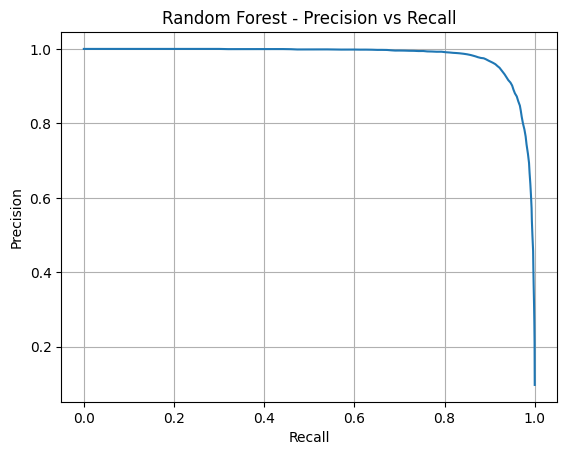

In [61]:
#  3. رسم Precision-Recall Curve
from sklearn.metrics import precision_recall_curve

prec_rf, recall_rf, thresholds_rf = precision_recall_curve(y_train8, y_scores_rf)

plt.plot(recall_rf, prec_rf)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Random Forest - Precision vs Recall")
plt.grid(True)
plt.show()


In [62]:
# 4. پیدا کردن بهترین Threshold (مثلاً جایی که precision ≥ 90٪)
best_thresh = thresholds_rf[(prec_rf >= 0.9).argmax()]
y_pred_90prec = (y_scores_rf >= best_thresh)

from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train8, y_pred_90prec))
print("Recall:", recall_score(y_train8, y_pred_90prec))


Precision: 0.9015409570154096
Recall: 0.9499230900700735


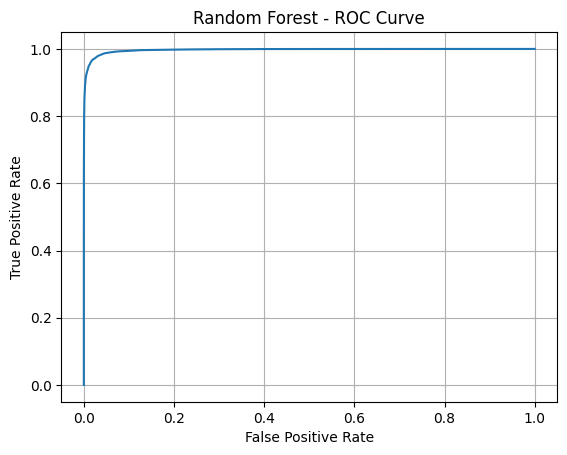

ROC AUC: 0.9968989599233995


In [63]:
 # 5. رسم ROC Curve و محاسبه AUC
from sklearn.metrics import roc_curve, roc_auc_score

fpr_rf, tpr_rf, _ = roc_curve(y_train8, y_scores_rf)
plt.plot(fpr_rf, tpr_rf)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest - ROC Curve")
plt.grid(True)
plt.show()

print("ROC AUC:", roc_auc_score(y_train8, y_scores_rf))


---
"""
# انواع طبقه بندی:
#_____________________
 
# Binary Classification | طبقه‌بندی دودویی
مثل یه کلید روشن/خاموش. مدل فقط بین دو کلاس تصمیم می‌گیره.
مثال:

    ایمیل اسپم است یا نه؟
    بیمار مبتلا به سرطان هست یا نیست؟
 ورودی: یک نمونه (مثلاً یک ایمیل)
 خروجی: فقط یک برچسب از دو گزینه: [0 یا 1]، [اسپم یا غیر اسپم]
 
#_____________________

#  Multiclass Classification | طبقه‌بندی چندکلاسه
وقتی فقط یک برچسب به هر ورودی می‌چسبه، ولی تعداد برچسب‌ها بیشتر از دوتاست.
مثال:

    تشخیص نوع حیوان: گربه، سگ، اسب، پرنده
    تشخیص رقم دست‌نویس: 0 تا 9
 ورودی: یک نمونه (مثلاً تصویر یک حیوان)
 خروجی: دقیقاً یک برچسب از بین چند گزینه (مثلاً فقط "سگ")

#_____________________

# Multilabel Classification | طبقه‌بندی چندبرچسبی
برخلاف مورد بالا، اینجا چند برچسب می‌تونه به یک ورودی تعلق بگیره.
مثال:

    یک آهنگ ممکنه همزمان ژانرهای "پاپ"، "الکترونیک" و "رقص" داشته باشه.
    یک عکس ممکنه هم "سگ" داشته باشه و هم "دوچرخه".
📦 ورودی: یک نمونه (مثلاً یک تصویر)
🎯 خروجی: لیستی از برچسب‌هایی که بهش می‌خوره (مثلاً [1, 0, 1, 1] برای ۴ کلاس)

#_____________________

# Multi-Output Classification | طبقه‌بندی چندخروجی
حالا برسیم به اصل ماجرا...
تعریف:
وقتی که یک مدل باید چند ویژگی متفاوت از یک ورودی رو به‌صورت همزمان پیش‌بینی کنه، بهش می‌گیم Multi-output Classification.
"""

---
 # Multiclass Classification

#  One-vs-Rest (OvR) یا One-vs-All (OvA)
"""
دلیل نام گذاری:

    One = یه کلاس خاص (مثلاً عدد 3)
    vs = در برابر، مقابل، مقابله
    
    برای هر کلاس، یک مدل می‌سازیم که اون کلاس رو در برابر همه‌ی کلاس‌های دیگه تشخیص بده

 برای هر کلاس، یک مدل جداگونه آموزش می‌دیم که یاد بگیره تشخیص بده:
پس اگه n تا کلاس داشته باشیم، n تا مدل می‌سازیم.


شهود:

    فرض کن 10 تا کاندیدا داریم (مثل 0 تا 9) و هر کدوم می‌خواد رئیس جمهور شه.
    هر کاندیدا می‌گه:
    «یا من، یا هیچ‌کس دیگه!».
    در نهایت به کسی که بلندترین و مطمئن‌ترین فریاد رو زده، رأی رو می‌دیم.        

مزایا:

    - ساده‌تر و سریع‌تر برای تعداد زیاد کلاس‌ها
    - مناسب برای الگوریتم‌هایی که فقط باینری هستن


معایب:
    
    1- در One-vs-Rest (OvR)، هر مدل باید روی کل دیتاست آموزش ببینه.
    در این حالت، برای هر عدد (مثلاً 3) ما باید یک مدل train کنیم که بگه:

    "آیا این تصویر 3 هست یا نه؟"
    پس برای مدل «3 در مقابل بقیه»، باید:
        6000 تصویر کلاس 3 رو بگیریم (مثبت)
        54000 تصویر بقیه کلاس‌ها رو هم بگیریم (منفی)

    → کل دیتای مورد استفاده برای هر مدل = کل دیتاست
    👎 یعنی هر مدل روی 60,000 نمونه آموزش می‌بینه
    و این رو 10 بار تکرار می‌کنیم.


    2- خروجی خیلی قوی حتی وقتی اشتباهه (مشکل confidence در OvR)
    3- دیتای Unbalanced (عدم توازن بین کلاس مثبت و منفی)
    فرض کن در دیتاست، از 1000 تصویر، فقط 100 تا «سگ» داریم و 900 تا «گربه» و «فیل».الان مدل ممکنه یاد بگیره با گفتن «همه رو بزن نه!»، به دقت 90٪ برسه! ولی هیچ ارزشی نداره چون سگ‌ها رو پیدا نمی‌کنه.
"""

# One-vs-One (OvO)
"""
دلیل نام گذاری:

    برای هر جفت از دو کلاس، یک مدل جداگانه می‌سازیم که فقط بین اون دو کلاس تصمیم‌گیری کنه.

    پس اگر n تا کلاس داشته باشیم، تعداد مدل‌ها میشه:
    n*(n-1)/2


شهود:

    اینو مثل یه لیگ فوتبال فرض کن.
    هر تیم (عدد) با تمام تیم‌های دیگه بازی می‌کنه (مدل دو‌به‌دو).
    در نهایت تیمی که بیشترین برد رو آورده، قهرمانه!مسابقات دو‌به‌دو آورده.

    یا در مثال ام نیست:
    فرض کن ما می‌خوایم یه مدل بسازیم که وقتی بهش یه تصویر از یک عدد (رقم دست‌نویس) نشون می‌دیم، بگه این چیه:
    0؟ 1؟ 2؟ … یا 9؟
        
    در OvO، برای هر دو عدد ممکن، یک مدل می‌سازیم.
    هر مدل فقط بین همون دوتا تصمیم می‌گیره.

    "بین این دوتا کدومه؟
         پس چه مدل‌هایی می‌سازیم؟
        بیا از عدد 0 شروع کنیم:
            0 vs 1
            0 vs 2
            0 vs 3
            ...
            0 vs 9
        
        بعد از 0، می‌ریم سراغ 1:
            1 vs 2
            1 vs 3
            ...
            1 vs 9
        همینطور ادامه می‌دیم تا:
         8 vs 9

        اینطوری 45 تا مدل میسازیم چون
        10*(10-1)/2 

 مزایا
 
    1- در One-vs-One، هر مدل فقط با زیرمجموعه کوچکی از کل داده آموزش می‌بینه.
    در این حالت، هر مدل فقط بین دو عدد خاص قضاوت می‌کنه. مثلاً:
    مدل «3 vs 7» فقط نیاز به:
        6000 تصویر کلاس 3
        6000 تصویر کلاس 7

    → فقط 12,000 تصویر برای این مدل لازم داریم.
    و چون OvO فقط روی دو کلاس متمرکزه، پس دیتای آموزشی هر مدل:
    - کوچکتره
    - متوازن‌تره (class imbalance کمتره)
    - ساده‌تره (feature space تمیزتره)

    2- هر مدل فقط روی دو کلاس آموزش می‌بینه → کلاس‌ها balanced هستن
    - دقت بالا چون تمرکز روی تفکیک دو به دوئه
    
معایب:

    - تعداد مدل‌ها زیاد میشه: برای 10 کلاس → 45 مدل!
    - زمان آموزش و حافظه زیاد می‌خواد
    
"""

"""
جواب قطعی  که OvR  سریع تر یا OvO وجود نداره و بستگی داره به:

        - الگوریتمی که استفاده می‌کنی (مثل SVM یا Logistic Regression)
        - تعداد کلاس‌ها (n)
        - تعداد نمونه‌ها (m)
        - زمان آموزش مدل نسبت به حجم داده و تعداد نمونه‌های آن
"""

 # کد اماده برای OvO و OvR 
### کتابخانه سایکیت لرن کار را راحت کرده توسط SVM 

"""
# SVM
ماشین بردار پشتیبان 
SVM یک الگوریتم یادگیری نظارت شده است که برای مسائل طبقه‌بندی و رگرسیون استفاده می‌شود. ایده اصلی SVM یافتن یک ابرصفحه (hyperplane) است که داده‌ها را به بهترین شکل ممکن جدا کند. ابرصفحه، یک خط یا صفحه است که داده‌ها را به دو یا چند کلاس تقسیم می‌کند.

# SVC
 مخفف Support Vector Classification است و برای طبقه‌بندی داده‌ها استفاده می‌شود. این کلاس پارامترهای مختلفی دارد که می‌توانید برای تنظیم مدل SVM استفاده کنید. برخی از مهم‌ترین پارامترها عبارتند از:
        
    kernel: نوع کرنل مورد استفاده در الگوریتم را مشخص می‌کند. کرنل‌ها توابعی هستند که برای تبدیل داده‌ها به فضای ویژگی با ابعاد بالاتر استفاده می‌شوند. برخی از کرنل‌های رایج عبارتند از:
    
        linear: کرنل خطی
        poly: کرنل چندجمله‌ای
        rbf: کرنل تابع پایه شعاعی (Radial Basis Function)
        sigmoid: کرنل سیگموئید
    
    C: پارامتر منظم‌سازی (regularization) است که تعادل بین طبقه‌بندی صحیح داده‌های آموزشی و حداکثر کردن حاشیه را کنترل می‌کند. مقادیر کوچک C منجر به حاشیه بزرگ‌تر و مقادیر بزرگ C منجر به طبقه‌بندی دقیق‌تر داده‌های آموزشی می‌شود.
    gamma: ضریب کرنل برای کرنل‌های rbf، poly و sigmoid است. gamma نحوه تأثیر هر نمونه آموزشی بر تصمیم‌گیری را تعیین می‌کند. مقادیر کوچک gamma منجر به تأثیر گسترده‌تر و مقادیر بزرگ gamma منجر به تأثیر محدودتر می‌شود.
    degree: درجه کرنل چندجمله‌ای (poly) را مشخص می‌کند.

# SVR
رگرسیون بردار پشتیبان

sklearn.svm.SVR یک کلاس در کتابخانه scikit-learn پایتون است که برای ایجاد مدل‌های ماشین بردار پشتیبان (SVM) برای مسائل رگرسیون استفاده می‌شود.


پارامترهای مهم SVR

    SVR پارامترهای مختلفی دارد که می‌توانید برای تنظیم مدل استفاده کنید. برخی از مهم‌ترین پارامترها عبارتند از:

    kernel: نوع کرنل مورد استفاده در الگوریتم را مشخص می‌کند. کرنل‌ها توابعی هستند که برای تبدیل داده‌ها به فضای ویژگی با ابعاد بالاتر استفاده می‌شوند. برخی از کرنل‌های رایج عبارتند از:
        linear: کرنل خطی
        poly: کرنل چندجمله‌ای
        rbf: کرنل تابع پایه شعاعی (Radial Basis Function)
        sigmoid: کرنل سیگموئید
    C: پارامتر منظم‌سازی (regularization) است که تعادل بین برازش داده‌های آموزشی و ساده‌سازی مدل را کنترل می‌کند. مقادیر کوچک C منجر به مدل ساده‌تر و مقادیر بزرگ C منجر به برازش دقیق‌تر داده‌های آموزشی می‌شود.
    epsilon: حداکثر خطای مجاز بین مقادیر پیش‌بینی شده و مقادیر واقعی را تعیین می‌کند.
    gamma: ضریب کرنل برای کرنل‌های rbf، poly و sigmoid است. gamma نحوه تأثیر هر نمونه آموزشی بر تصمیم‌گیری را تعیین می‌کند. مقادیر کوچک gamma منجر به تأثیر گسترده‌تر و مقادیر بزرگ gamma منجر به تأثیر محدودتر می‌شود. 


تفاوت SVR با SVC

    SVC: برای طبقه‌بندی (Classification) داده‌ها استفاده می‌شود، یعنی پیش‌بینی برچسب یا دسته یک نمونه.
    SVR: برای رگرسیون (Regression) داده‌ها استفاده می‌شود، یعنی پیش‌بینی یک مقدار پیوسته برای یک نمونه.

    به‌طور خلاصه، SVC برای مسائل طبقه‌بندی و SVR برای مسائل رگرسیون استفاده می‌شود.
    
"""

# مقایسه OvO و OvR با استفاده از  SVM 


In [64]:
# مقایسه OvO و OvR

# 1. بارگذاری و آماده‌سازی داده‌ها (digits dataset)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# دیتاست ارقام 0 تا 9
digits = datasets.load_digits()

# برای ساده‌سازی فقط 1000 نمونه اول رو استفاده کردیم
X, y = digits.data[:1000], digits.target[:1000]

# تقسیم به آموزش و تست، با حفظ نسبت کلاس‌ها
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# نرمال‌سازی ویژگی‌ها (scaling) برای بهتر شدن عملکرد مدل‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# 2. . ساخت مدل‌ها: OvR و OvO با Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# OvR (یکی در برابر همه)
ovr_clf = OneVsRestClassifier(LogisticRegression(max_iter=1000))

# OvO (دوتایی‌ها)
ovo_clf = OneVsOneClassifier(LogisticRegression(max_iter=1000))

# آموزش مدل‌ها روی دادهٔ نرمال‌شده
ovr_clf.fit(X_train_scaled, y_train)
ovo_clf.fit(X_train_scaled, y_train)


# 3. پیش‌بینی و ارزیابی دقت
from sklearn.metrics import accuracy_score

# پیش‌بینی روی داده تست
ovr_preds = ovr_clf.predict(X_test_scaled)
ovo_preds = ovo_clf.predict(X_test_scaled)

# محاسبه دقت (Accuracy)
ovr_score = accuracy_score(y_test, ovr_preds)
ovo_score = accuracy_score(y_test, ovo_preds)

# چاپ دقت‌ها
print("OvR Accuracy:", ovr_score)
print("OvO Accuracy:", ovo_score)


OvR Accuracy: 0.9733333333333334
OvO Accuracy: 0.9966666666666667


# SVC

In [65]:
from sklearn.svm import SVC
 # به صورت دیفالت از OvO استفاده میکنه

In [66]:
y_train

array([8, 2, 9, 1, 6, 4, 6, 7, 6, 0, 5, 4, 5, 9, 2, 0, 9, 5, 8, 0, 1, 4,
       7, 5, 6, 3, 1, 2, 8, 1, 3, 8, 2, 5, 6, 5, 9, 3, 4, 8, 9, 2, 1, 7,
       7, 3, 8, 9, 5, 3, 3, 3, 6, 0, 7, 8, 4, 2, 8, 2, 6, 3, 5, 8, 8, 4,
       3, 2, 0, 7, 1, 5, 5, 1, 1, 1, 0, 5, 4, 4, 9, 3, 7, 0, 9, 4, 5, 7,
       6, 5, 7, 4, 0, 7, 7, 4, 8, 8, 0, 0, 7, 6, 5, 3, 4, 6, 2, 1, 4, 6,
       6, 1, 7, 8, 5, 0, 9, 2, 7, 7, 5, 4, 8, 3, 2, 0, 8, 2, 1, 9, 3, 2,
       0, 6, 9, 7, 7, 0, 7, 7, 5, 0, 0, 3, 1, 5, 6, 0, 4, 1, 3, 5, 8, 3,
       8, 4, 5, 3, 7, 7, 1, 7, 6, 5, 3, 5, 9, 4, 1, 7, 0, 2, 2, 9, 6, 6,
       2, 1, 5, 6, 9, 1, 6, 3, 9, 4, 7, 9, 0, 3, 3, 2, 4, 1, 1, 1, 4, 9,
       3, 1, 4, 1, 8, 3, 0, 4, 3, 1, 0, 8, 6, 6, 7, 3, 9, 4, 1, 6, 4, 6,
       5, 1, 9, 9, 3, 7, 4, 4, 2, 6, 7, 4, 7, 0, 5, 5, 0, 4, 6, 2, 5, 0,
       8, 6, 0, 8, 7, 8, 8, 7, 0, 1, 4, 3, 2, 3, 2, 3, 3, 5, 3, 3, 8, 7,
       3, 3, 5, 2, 4, 4, 4, 6, 9, 6, 8, 4, 2, 2, 4, 7, 6, 4, 6, 9, 6, 3,
       1, 6, 6, 9, 2, 8, 6, 5, 9, 5, 1, 5, 2, 0, 3,

In [67]:
svc = SVC()
svc.fit(X_train[:1000], y_train[:1000])
# هزارتای اول رو بر میداریم چون خیلی زیاده

SVC()

In [68]:
svc.predict([X_train[0]])
# در اصل 45 تا پردییکشن انجام داده چون برای OvO تعداد مدلها 45 تا بود

array([8])

In [69]:
svc.decision_function([X_train[0]])
# که اسکور را به ترتیب برای کلاس صفر و یک و دو .. نه حساب کرده که 5 از همه بیشتره بنابراین گفته 5

array([[-0.28606227,  7.16999456,  6.00289654,  0.74420321,  1.74908284,
         6.14934723,  2.80607609,  3.89893037,  9.30688637,  7.14352896]])

In [70]:
svc.classes_
# برای اینکه بدونیم که هر کدام از قبلی ها متناظر با چه کلاسی هستند 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [71]:
from sklearn.multiclass import OneVsRestClassifier
 #  به صورت دیفالت از OvO استفاده میکنه
#  برای اینکه از OvR استفاده کنه کد بالا رو ایمپورت میکنیم

In [72]:
ovr_svm = OneVsRestClassifier(SVC())
# مدل را به حالت  OvR برمیگرداند

In [73]:
ovr_svm.fit(X_train[:1000], y_train[:1000])

OneVsRestClassifier(estimator=SVC())

In [74]:
ovr_svm.predict([X_train[0]])

array([8])

---
# ConfusionMatrix for svc

 # Multiclass Classification ارزیابی

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay

In [76]:
y_pred = cross_val_predict(svc, X_train[:1000], y_train[:1000], cv=3)

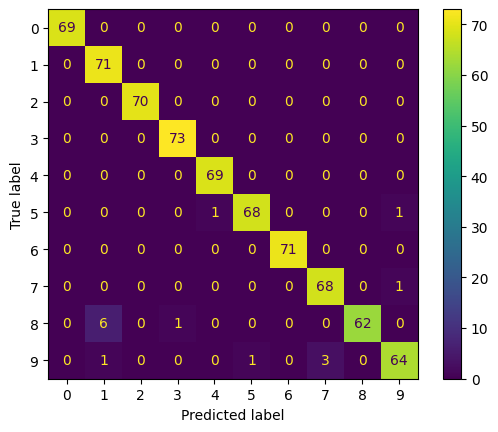

In [77]:
ConfusionMatrixDisplay.from_predictions(y_train[:1000], y_pred)

 # نمایش ماترسی درهم ریختیگی بر اساس درصد

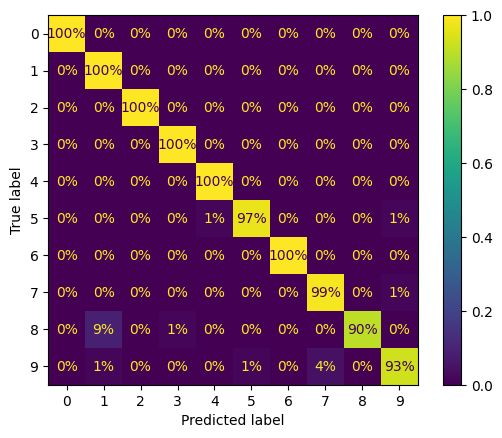

In [78]:
ConfusionMatrixDisplay.from_predictions(y_train[:1000],
                                        y_pred,
                                        normalize="true",
                                        values_format=".0%")
# برای اینکه درصدی نشون بده نرمالایز میکنیم
# برای اینکه بدون رقم اعشار باشه 

 # تمرکز ماتریس در هم ریختگی بر روی خطاها

In [79]:
weights = (y_pred != y_train[:1000])
# ایجاد آرایه weights:
#     weights = (y_pred != y_train[:1000])
#     این خط کد یک آرایه بولی به نام weights ایجاد می‌کند.
#     این آرایه نشان می‌دهد که آیا هر پیش‌بینی در y_pred با مقدار واقعی متناظر در y_train[:1000] برابر است یا خیر.
# اگر پیش‌بینی نادرست باشد (y_pred != y_train[:1000])، مقدار مربوطه در weights برابر با True خواهد بود. در غیر این صورت، برابر با False خواهد بود.

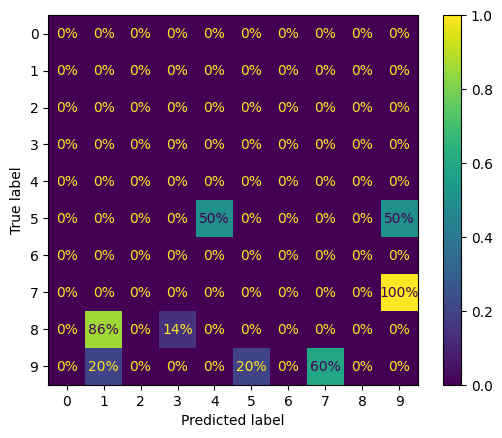

In [80]:
ConfusionMatrixDisplay.from_predictions(y_train[:1000],
                                        y_pred,
                                        sample_weight=weights,
                                        normalize="true",
                                        values_format=".0%")
# برای اینکه روی خطاها تمرکز کنه  یعنی درصد پریدیکشن درست رو صفر بذاره 
# آرایه weights مسئول تمرکز بر خطاها در هنگام نمایش ماتریس درهم‌ریختگی است.
# نتیجه این است که درصد خطاها را نشان میده


---
# Multilabel Classification
#### مثلا سگ هست یا نه و اگر هست نژادش چیه و یا سفید یا مشکی یا..

In [81]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [ ]:
y_train_above5 = (y_train > '5') #آیا مقدار برچسب از 5 بزرگ‌تره؟
y_train_even = (y_train.astype(np.int) % 2 == 0)  # آیا برچسب عدد زوج هست؟
# astype(np.int) برای تبدیل رشته‌ها به عدد صحیح استفاده شده.



In [ ]:
y_train_ml = np.c_[y_train_above5, y_train_even]
# np.c_[] یه راه ساده برای اتصال ستون‌ها (column-wise concatenation) هست. معادل دقیقش:
# np.concatenate([y_train_above5[:, None], y_train_even[:, None]], axis=1)
# عبارت [:, None] در پایتون (با NumPy) یعنی:
# یک بُعد جدید اضافه کن در محور دوم (ستون‌ها).

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train_ml)

In [ ]:
knn.predict([X_train[0]])

In [ ]:
y_pred = cross_val_predict(knn, X_train, y_train_ml, cv=3)

 # ارزیابی

In [ ]:
f1_score(y_train_ml, y_pred, average="macro")
# یعنی با اهمیت یکسان
# اما اگر weighted بود به تعداد یا وزنی که مدنظرمونه اهمیت بدی

---
# _ Multi-Output Classification
# _ ClassifierChain

In [ ]:
from sklearn.multioutput import ClassifierChain
#multilabel خودش زیرمجموعه‌ای از multi-output classification محسوب میشه.

# پس:
    # ✅ Multilabel Classification یک نوع خاص از Multi-Output Classification هست
    # و به همین دلیل، توی کتابخانه Scikit-Learn، کلاس‌هایی که برای multi-output طراحی شدن (مثل ClassifierChain, MultiOutputClassifier) برای multilabel هم به کار میرن.

In [ ]:
chain_svc = ClassifierChain(SVC(), cv=3)
#مدل ClassifierChain برای Multilabel Classification طراحی شده تا :
# بجای اینکه برای هر برچسب (label) یک مدل جداگانه آموزش بدیم، بیایم مدل‌ها رو به‌صورت زنجیره‌ای آموزش بدیم؛ طوری که خروجی هر مدل، به عنوان ورودی به مدل بعدی هم داده بشه.

# cv همان کراس ولیدیشن هستش
#می‌گه: «برای تولید خروجی مدل‌های قبلی (که قراره ورودی مدل بعدی باشن)، از ۳-تایی cross-validation استفاده کن».
# یعنی به‌جای اینکه از برچسب واقعی استفاده کنیم (که مدل بعدی لو نره)، خروجی مدل قبلی رو با کراس‌ولیدیشن پیش‌بینی می‌کنیم.

In [ ]:
chain_svc.fit(X_train[:2000], y_train_ml[:2000])

In [ ]:
chain_svc.predict([X_train[0]])

---
# Multioutput classification

In [ ]:
X_train.shape

In [ ]:
np.random.seed(40)
image_noise = np.random.randint(0, 100, X_train.shape)
X_train_noisy = X_train + image_noise
image_noise = np.random.randint(0, 100, X_test.shape)
X_test_noisy = X_test + image_noise
y_train_mc = X_train
y_test_mc = X_test 

In [ ]:
plt.imshow(X_train[0].reshape(28, 28), cmap="binary")

In [ ]:
plt.imshow(X_train_noisy[0].reshape(28, 28), cmap="binary")

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_noisy, y_train_mc)

In [ ]:
plt.imshow(X_test_noisy[0].reshape(28, 28), cmap="binary")

In [ ]:
pred = knn.predict([X_test_noisy[0]])

In [ ]:
pred.shape

In [ ]:
plt.imshow(pred.reshape(28, 28), cmap="binary")

---
# ارزیابی مدل‌های Multi-output یا Multilabel
"""
#_______________________

    macro:
    1.    F1 را جداگانه برای هر کلاس محاسبه می‌کنه
    F1 = 2 * (Precision * Recall) / (Precision + Recall)
    2. بعد بدون وزن دادن به فراوانی، ازش میانگین می‌گیره
    
         آنالوژی:
            فرض کن داری دانش‌آموزهایی از کلاس‌های مختلف نمره‌دهی می‌کنی. برای هر کلاس، فقط میانگین نمره رو می‌گیری، مهم نیست چند دانش‌آموز تو اون کلاس بودن.
         
         کلاس‌ها:
        ریاضی: 50 نفر، F1 = 0.9
        فیزیک: 30 نفر، F1 = 0.6
        ادبیات: 20 نفر، F1 = 0.3
        F1_macro = (F1_ریاضی + F1_فیزیک + F1_ادبیات) / 3
                 = (0.9 + 0.6 + 0.3) / 3
                 = 1.8 / 3 = 0.6
               


            
            📌 خطر: اگه بعضی کلاس‌ها خیلی کم‌تعداد باشن ولی مدل اون‌ها رو خراب یاد گرفته باشه، این متریک همچنان نمره خوبی نشون می‌ده. پس برای داده‌ی نامتوازن (imbalanced) خوب نیست.
#_______________________

    weighted:
    مثل macro ولی به فراوانی هر کلاس وزن می‌ده.
        آنالوژی:

        همون مثال مدرسه: الان نمرات کلاس‌های بزرگ‌تر مهم‌تر شدن. یعنی:
            F1 هر کلاس رو حساب کن
            بعد با توجه به تعداد دانش‌آموزهای هر کلاس، نمره میانگین بگیر
        
        کلاس‌ها:
        ریاضی: 50 نفر، F1 = 0.9
        فیزیک: 30 نفر، F1 = 0.6
        ادبیات: 20 نفر، F1 = 0.3
        F1_weighted = (50 * 0.9 + 30 * 0.6 + 20 * 0.3) / (50 + 30 + 20)
                    = (45 + 18 + 6) / 100
                    = 69 / 100 = 0.69  

        

        تفاوت ماکرو و ویت:
        در macro فرض بر اینه که همه کلاس‌ها به یه اندازه مهم هستن — حتی اگر کلاس ادبیات فقط 1 نفر داشته باشه
        ولی در weighted، میانگین رو می‌گیریم با توجه بهتعداد نمونه‌ها در هر کلاس

        📌 اگر داده‌هات نامتوازن باشن، این خیلی بهتر از macro کار می‌کنه چون مدل ممکنه عملاً فقط کلاس‌های پرتعداد رو یاد بگیره.
#_______________________

    micro:
            همه‌ی پیش‌بینی‌ها رو یکی فرض کن؛ کلاس‌ها رو نادیده می‌گیره.

        دقیقاً چیکار می‌کنه؟
            همه‌ی TP، FP، FN رو برای کل دیتا جمع می‌کنه
            بعد فقط یک F1 حساب می‌کنه (بدون جدا کردن کلاس‌ها)
            همه کلاس‌ها رو یکی می‌کنه


            مجموع:
                True Positives
                False Positives
                False Negatives
        
            بعد فقط یک Precision و Recall و F1 حساب می‌کنه
            📎 فرمول:
            F1_micro = 2 * (Precision_micro * Recall_micro) / (Precision_micro + Recall_micro)
            
            که:
            Precision_micro = total_TP / (total_TP + total_FP)
            Recall_micro    = total_TP / (total_TP + total_FN)
            
            ✅ مستقل از کلاس، فقط روی تمام پیش‌بینی‌ها نگاه می‌کنه.


         آنالوژی:
        فکر کن کل مدرسه فقط یه امتحان داده و داری کارایی مدل رو در سطح کلی نگاه می‌کنی، بدون توجه به کلاس یا موضوع.
        
        📌 برای Multilabel classification یا multi-output، این متریک بیشتر رفتار کلی مدل رو می‌سنجه.
#_______________________

    samples:
        میانگین F1 برای هر نمونه (سطر) رو می‌گیره، نه کلاس.
        
        برای هر نمونه (هر سطر)، یه F1 جدا می‌گیره
        بعد از تمام نمونه‌ها، میانگین می‌گیره
        
        📎 فرمول:
            F1_samples = (F1_sample1 + F1_sample2 + ... + F1_sampleN) / N_samples
        #_______________________

    classifier chains:
        تعریف:
        در Multi-output classification، می‌تونی هر خروجی رو مستقل آموزش بدی؛ ولی یه راه هوشمندانه‌تر، استفاده از Classifier Chains هست.
        چی کار می‌کنه؟
        
        به‌جای اینکه خروجی‌ها رو کاملاً مستقل آموزش بدیم، مدل‌های بعدی از پیش‌بینی‌های قبلی به عنوان ورودی استفاده می‌کنن.
        آنالوژی:
        
        فرض کن قراره سن و احساس و جنسیت کسی رو از چهره‌اش بگی. شاید تشخیص "عینک داشتن" روی تشخیص "سن" اثر داشته باشه (چون معمولاً آدمای مسن عینک دارن).
        
        Classifier chain این رابطه‌ها رو حفظ می‌کنه.
        
#_______________________

    Hamming Loss:
        درصد برچسب‌های نادرست در total predictions
        from sklearn.metrics import hamming_loss
      
#_______________________

    Subset Accuracy
    فقط اگر تمام خروجی‌ها درست باشن، می‌گه "درسته" (خیلی سخت‌گیره!)
    from sklearn.metrics import accuracy_score
    
#_______________________

در ارزیابی مدل‌های چندکلاسه یا چندبرچسبی، پارامتر average نقش مهمی دارد:

    - macro: میانگین F1 برای تمام کلاس‌ها بدون توجه به نمونه در هر کلاس،  به طور مساوی (مناسب برای داده متوازن)
    - weighted: میانگین F1 با وزن‌دهی به اندازه کلاس‌ها. با توجه به تعداد نمونه (مناسب برای داده نامتوازن). یعنی  میانگین F1 با توجه به تعداد نمونه در هر کلاس.
    - micro: F1 کلی بر اساس مجموع کل نمونه‌ها (مناسب برای multilabel یا overview).
    همه کلاس‌ها یکی فرض شده و F1 کلی گرفته می‌شود
    
    - samples: مخصوص multilabel، میانگین F1 در سطح نمونه (نه کلاس). یعنی برای هر نمونه F1 محاسبه میشه و میانگین گرفته میشه
    
    Classifier Chains نیز روشی هوشمندانه در Multi-output classification است که از وابستگی بین خروجی‌ها بهره می‌گیرد و در شرایطی که خروجی‌ها همبستگی دارند بسیار مؤثر است.
 
    """

 # مثال از ارزیابی مالتی لیبل و مالتی اوت پوت
سناریوی ساده با داده واقعی (Multilabel Example)

ما ۵ دانش‌آموز داریم و برای هر دانش‌آموز مشخصه که در کدوم کلاس‌ها پاس شده (یعنی 1) و در کدوم افتاده (یعنی 0).

#_______________________

✅ Ground truth (y_true) — واقعیت:
دانش‌آموز	ریاضی	فیزیک	ادبیات
A	1	0	1
B	1	1	0
C	0	0	1
D	1	1	0
E	0	1	1

y_true = [
    [1, 0, 1],
    [1, 1, 0],
    [0, 0, 1],
    [1, 1, 0],
    [0, 1, 1]
]

#_______________________

✅ Predictions (y_pred) — پیش‌بینی مدل:
دانش‌آموز	ریاضی	فیزیک	ادبیات
A	1	0	0
B	1	1	0
C	1	0	1
D	1	0	0
E	0	1	1

y_pred = [
    [1, 0, 0],
    [1, 1, 0],
    [1, 0, 1],
    [1, 0, 0],
    [0, 1, 1]
]

#_______________________

✅ 1. Macro F1
    اول F1 برای هر کلاس جدا:

کلاس ریاضی:

    TP = 3 (A, B, D)
    FP = 0
    FN = 0
    → F1 = 1.0

کلاس فیزیک:

    TP = 2 (B, E)
    FN = 1 (D)
    FP = 0
    → F1 = 0.8

کلاس ادبیات:

    TP = 2 (C, E)
    FN = 1 (A)
    FP = 0
    → F1 = 0.8

📎 پس:
F1_macro = (1.0 + 0.8 + 0.8) / 3 = 2.6 / 3 ≈ 0.87

#_______________________

✅ 2. Weighted F1

فرض کنیم تعداد دانش‌آموز در هر کلاس:

    ریاضی: 3

    فیزیک: 3

    ادبیات: 3
    (چون همه تقریباً ظاهر شدن، پس وزن‌ها برابر می‌شه)

F1_weighted = (3×1.0 + 3×0.8 + 3×0.8) / (3+3+3)
            = (3.0 + 2.4 + 2.4) / 9 = 7.8 / 9 ≈ 0.867

#_______________________

✅ 3. Micro F1

در Micro، همه‌ی کلاس‌ها رو قاطی می‌کنیم:

TP = تعداد ۱هایی که درست پیش‌بینی شده‌اند = 7
FP = تعداد ۱هایی که اشتباه پیش‌بینی شده‌اند = 1
FN = تعداد ۰هایی که باید ۱ می‌شدند = 2

Precision = TP / (TP + FP) = 7 / (7 + 1) = 7/8
Recall    = TP / (TP + FN) = 7 / (7 + 2) = 7/9

F1_micro = 2 * (Precision * Recall) / (Precision + Recall)
         = 2 * (7/8 * 7/9) / (7/8 + 7/9)
         ≈ 0.823

#_______________________

✅ 4. Samples F1

برای هر دانش‌آموز جداگانه F1 می‌گیریم:
دانش‌آموز	true	pred	F1
A	1 0 1	1 0 0	0.66
B	1 1 0	1 1 0	1.0
C	0 0 1	1 0 1	0.66
D	1 1 0	1 0 0	0.66
E	0 1 1	0 1 1	1.0

F1_samples = (0.66 + 1.0 + 0.66 + 0.66 + 1.0) / 5 = 4.0 / 5 = 0.8

#_______________________

✅ 5. Hamming Loss

تعداد اشتباهات تقسیم بر تعداد کل پیش‌بینی‌ها:

    کل مقدارها: 5 دانش‌آموز × 3 کلاس = 15

    اشتباه‌ها = تعداد 0 یا 1 که با y_true فرق دارن = 3

Hamming Loss = 3 / 15 = 0.2

#_______________________

✅ 6. Subset Accuracy (Exact Match)

تعداد نمونه‌هایی که کاملاً درست پیش‌بینی شدن:

    فقط دانش‌آموز B و E کاملاً درست پیش‌بینی شدن

Subset Accuracy = 2 / 5 = 0.4

#_______________________

✅ 7. Classifier Chains

این یکی متریک نیست، بلکه مدل آموزشی برای multi-output classification هست.
🤖 ایده‌اش:

در مدل‌های Multi-Label، ممکنه برچسب‌ها به هم وابسته باشن.

مثلاً: کسی که ریاضی قبول شده، احتمالاً فیزیک هم قبول شده!
Classifier Chain این کار رو می‌کنه:

    مدل برای ریاضی می‌سازه

    خروجی اون رو به عنوان ورودی می‌ده به مدل فیزیک

    بعد فیزیک → ورودی مدل ادبیات

یعنی:

X → y1 → y2 → y3

در واقع ترتیب می‌سازه بین برچسب‌ها.
#_______________________

✅ جمع‌بندی نهایی
متریک	تعریف	مقدار
F1_macro	میانگین F1 کلاس‌ها (وزن مساوی)	≈ 0.87
F1_weighted	میانگین F1 با وزن نسبت به تعداد نمونه در هر کلاس	≈ 0.867
F1_micro	F1 روی کل نمونه‌ها بدون درنظرگرفتن کلاس	≈ 0.823
F1_samples	میانگین F1 برای هر نمونه	0.8
Hamming Loss	تعداد اشتباهات تقسیم بر کل مقدارها	0.2
Subset Accuracy	درصد نمونه‌هایی که کاملاً درست پیش‌بینی شدن	0.4
Classifier Chains	روشی برای یادگیری وابسته بین خروجی‌ها (نه متریک)	—


---
 # ✅ جمع‌بندی نهایی متریک‌های ارزیابی مدل‌ها
"""
#__________________________________________________
#__________________________________________________

 1. متریک‌های مناسب برای Classification (تمام انواع)
 
#_______________________

✅ برای Binary:

Accuracy	✅	درصد درست پیش‌بینی‌ها
Precision, Recall, F1	✅	برای داده نامتوازن عالی
AUC-ROC	✅	عملکرد مدل برای تمام آستانه‌ها
Confusion Matrix	✅	جدول شمارش درست/اشتباه
Log Loss / Cross Entropy	✅	penalize می‌کنه اطمینان اشتباه رو

#_______________________


✅ برای Multiclass:

Accuracy	✅	درست بودن کلی
Macro Precision/Recall/F1	✅	میانگین بدون توجه به فراوانی
Micro Precision/Recall/F1	✅	میانگین با تجمیع پیش‌بینی‌ها
Weighted Precision/F1	✅	میانگین با توجه به کلاس پرجمعیت
Confusion Matrix	✅	ابعاد بزرگ‌تر (کلاس × کلاس)
Top-k Accuracy	✅	اگه جواب توی ۵ تا اول بود، موفقه
Log Loss	✅	penalize اطمینان اشتباه

#_______________________

✅ برای Multilabel:


Accuracy (subset acc)	✅	فقط اگه تمام برچسب‌ها درست باشن
Macro/Weighted/Micro F1	✅	روی همه‌ی کلاس‌ها یا پیش‌بینی‌ها
Samples F1	✅	هر سطر یه F1، بعد میانگین
Hamming Loss	✅	درصد خطا در هر برچسب جدا
Precision@k	✅	چندتا از top-k درست بودن؟
Ranking Loss	✅	موقعیت درست/نادرست در رتبه‌بندی
Coverage Error	✅	چقدر باید پیش‌بینی کنیم تا همه‌ی درست‌ها رو بگیریم
Classifier Chains	✅ مدل	نه متریک، ولی برای یادگیری عالیه

#_______________________

✅ برای Multioutput Classification:

یعنی مثلاً:
y = [label_A, label_B, label_C]
هر خروجی یه classification جداست (ولی مدل یکیه)

    در این حالت می‌تونی از:
        Hamming Loss ✅

        Samples Accuracy / F1 ✅

        Macro/Micro/Weighted ✅ (برای کل برچسب‌ها یا هر خروجی جدا)

        Subset Accuracy ✅

        Classifier Chains ✅ (برای خروجی‌های وابسته)
#__________________________________________________
#__________________________________________________

📈 2. متریک‌های ارزیابی Regression

#_______________________


Mean Absolute Error (MAE)	(مناسب برای همه نوع رگرسیون)	
توضیح: اختلاف میانگین قدر مطلق
#_______________________


Mean Squared Error (MSE)	(مناسب برای همه نوع)	
توضیح:اختلاف به توان دو (خطاهای بزرگ‌تر بیشتر جریمه می‌شن)
#_______________________

Root Mean Squared Error (RMSE)	(مناسب برای همه نوع)	
توضیح:ریشه‌ی MSE (هم‌مقیاس با خروجی)
#_______________________

R² Score (Coefficient of Determination)	(مناسب برای همه نوع)	
توضیح:درصدی از واریانس که مدل توضیح می‌ده
#_______________________

Mean Absolute Percentage Error (MAPE)	( مناسب برای نسبت‌ محور)	
توضیح:درصد خطای نسبی
#_______________________

Huber Loss	( مناسب برای رگرسیون مقاوم)	ترکیب MAE و MSE
#_______________________

Explained Variance	(مناسب برای رگرسیون چندگانه)	چه درصدی از واریانس داده رو مدل گرفته

"""